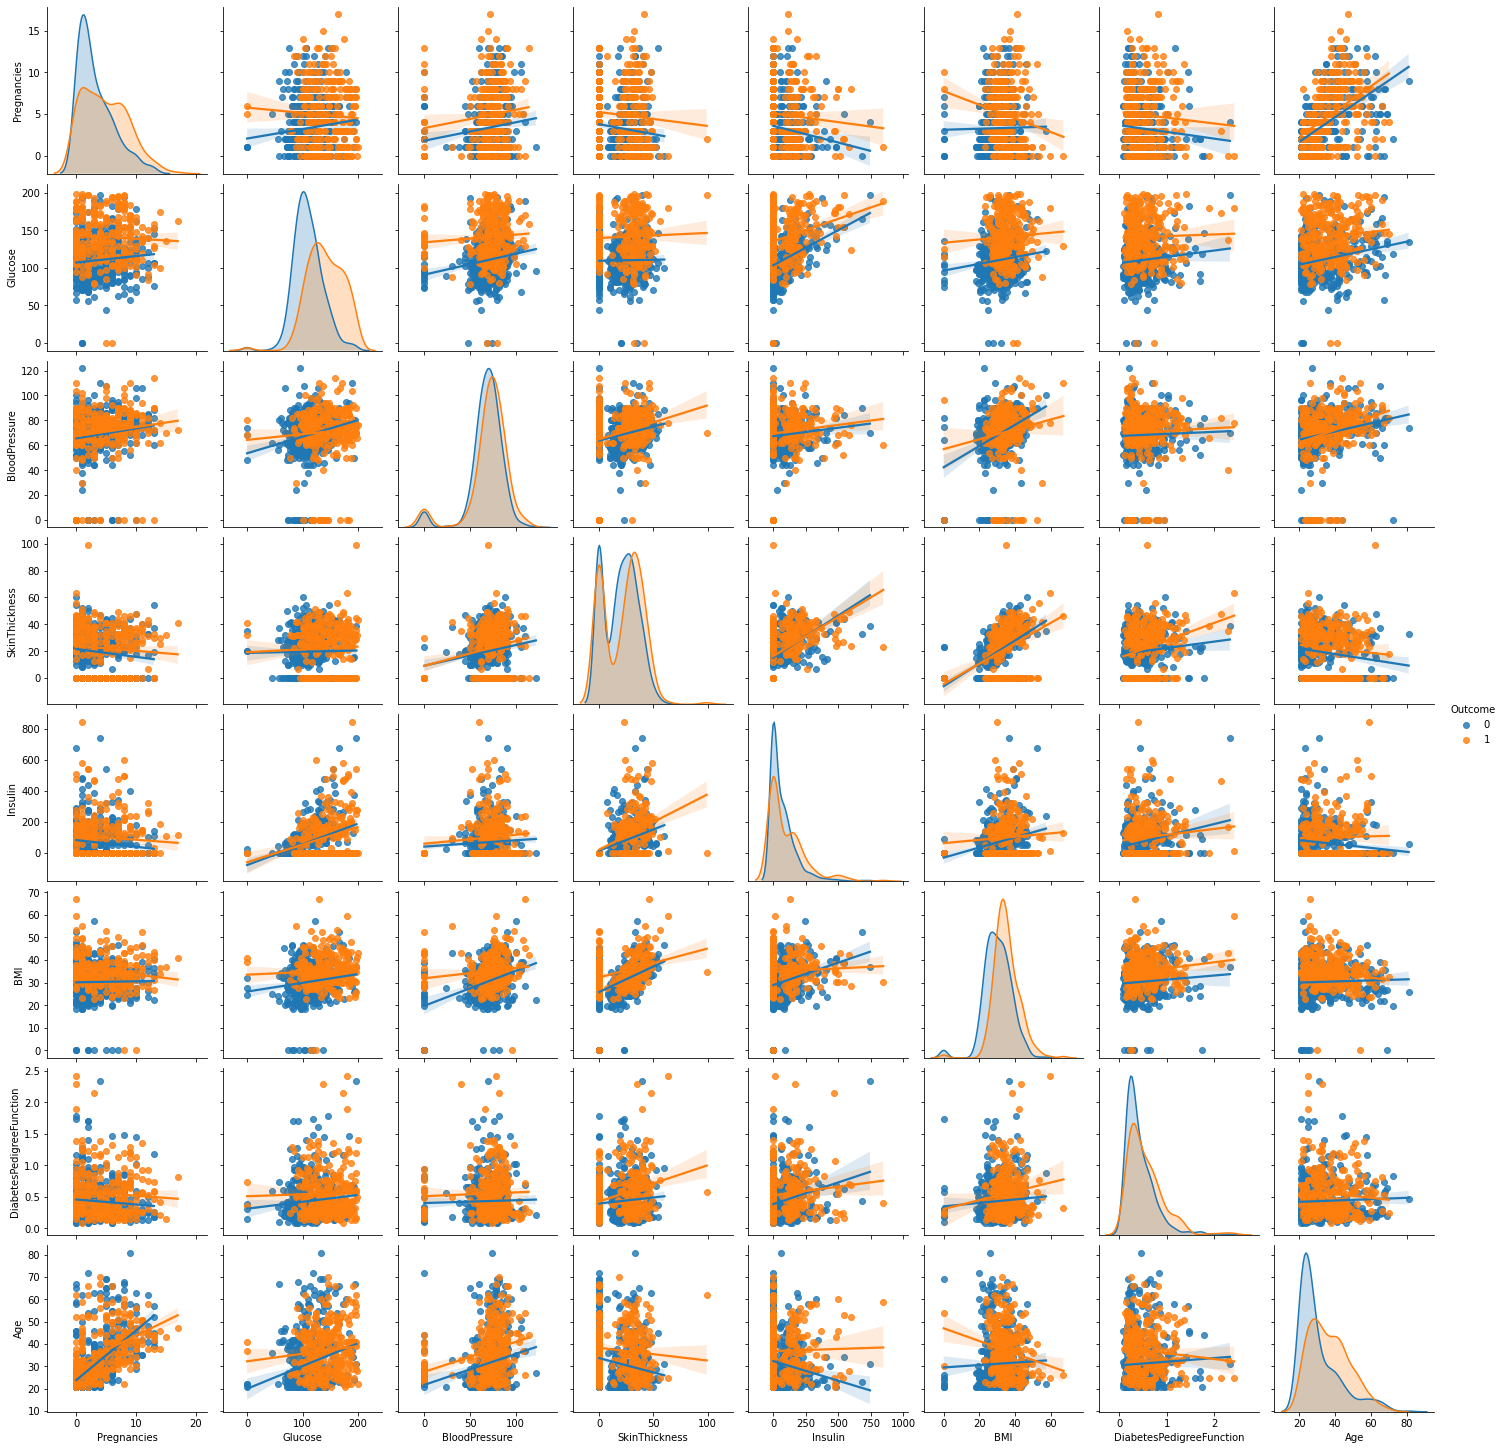


 Confusion matrix is : 
 [[141  16]
 [ 35  39]]


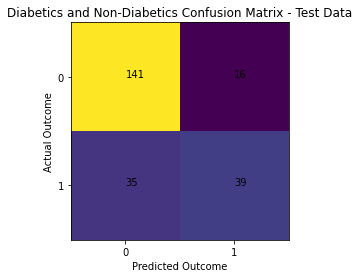

Accuracy:  0.7792207792207793
Precision:  0.7090909090909091
Recall:  0.527027027027027
[[141  16]
 [ 35  39]]


In [26]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# reading the dataset

df = pd.read_csv ('diabt.csv')
df.head(7)

#visualising the dataset by using pairplot from seaborn libraries

fig = sns.pairplot(df, hue= 'Outcome', kind='reg')
plt.show()


# classification of features into dependent and independent features

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = df [features];

y = df ['Outcome'];


#splitting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size =0.30, random_state = 0);


#model development and prediction

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


#fitting th model with data

lr.fit(X_train, y_train)

#prediction of value
y_pred = lr.predict(X_test)

#model evaluation using confusion matrix

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix (y_test, y_pred)
print ('\n Confusion matrix is : \n', confmat)

# visualizing confusion matrix

#plt.clf()

plt.imshow(confmat)
classNames = [0, 1]
plt.title ('Diabetics and Non-Diabetics Confusion Matrix - Test Data')
plt.xlabel ('Predicted Outcome')
plt.ylabel ('Actual Outcome')
tick_marks = np.arange (len(classNames))

for i in range(2):
    for j in range(2):
        plt.text(j, i, confmat[i][j])

plt.xticks (tick_marks, classNames)
plt.yticks (tick_marks, classNames)

plt.show()

#Confusion Matrix evaluation

from sklearn import metrics

print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print ('Precision: ', metrics.precision_score(y_test, y_pred))
print ('Recall: ', metrics.recall_score(y_test, y_pred))

#now lets make this model more interactive using GUI

import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def main():
    #creating root window
    root = tk.Tk()
    canvas1 = tk.Canvas(root, width = 500, height =300)
    canvas1.pack()
    print (confmat)
    #calling the event loop
    root.mainloop()
#calling the function main
main()